In [2]:
from cellpilot.inference.inference import Inference
import numpy as np
from PIL import Image
import cv2

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.17 (you have 1.4.11). Upgrade using: pip install --upgrade albumentations


In [3]:
# Replace with your model directory and model name
config = {
    "device": "cuda",
    "model_dir": "/vol/data/models/",
    "model_name": "model-ap0xl4l1:v19"
}
inference = Inference(config)

In [4]:
# Replace with the path to the image you want to analyze
image_name = "/home/ubuntu/thesis/data/CPM_15_and_17/cpm15/Images/image_01.png"
img = Image.open(image_name)
img_np = np.array(img)

In [5]:
masks, prompts = inference.segment_automatically(img_np)

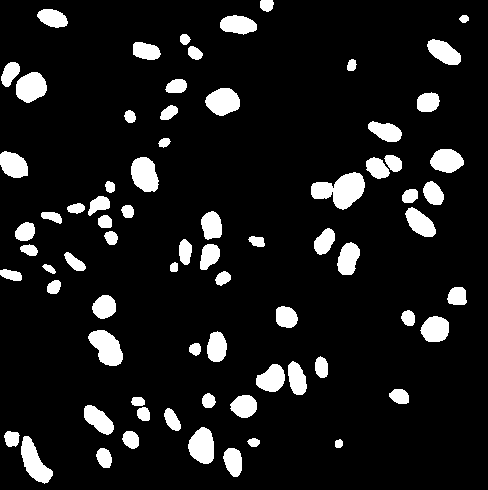

In [13]:
masks_binary = masks > 0
Image.fromarray(masks_binary.astype(np.uint8) * 255)

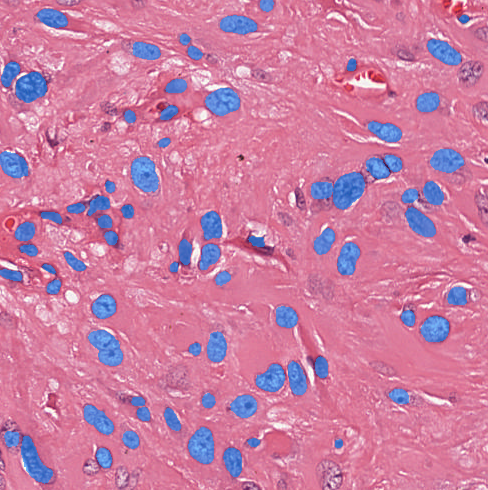

In [46]:
h, w = masks_binary.shape[-2:]
color = np.array([30, 144, 255]).astype(np.uint8)
colored_mask = masks_binary.reshape(h, w, 1) * color.reshape(1, 1, -1)
colored_mask = colored_mask.astype(np.uint8)
overlay =  np.where(colored_mask > 0, 0.4 * img_np, img_np)
overlay = overlay.astype(np.uint8)
overlay = cv2.addWeighted(overlay, 1.0, colored_mask, 0.6, 0.0)
Image.fromarray(overlay)